In [1]:
import tensorflow as tf
import tensorflow_addons as tfa


import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

path = './imagenes_derechas/*'

2021-08-21 16:07:53.372571: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-21 16:07:53.879126: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-21 16:07:53.924005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-21 16:07:53.924848: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.807GHz coreCount: 28 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 335.32GiB/s
2021-08-21 16:07:53.924872: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-21 16:07:53.928435: I tensorflow/stream_executor/

In [2]:
img_files = list(glob.glob(path))
img_files

['./imagenes_derechas/Ficheros_VARP_DFS,_Fichas_VARP_DFS,_fichas,_VARP-16-.JPG',
 './imagenes_derechas/Ficheros_PDLP_militantes_Avila_Almazan_Alejandro_Avila_Almazan_Alejandro-5-.JPG',
 './imagenes_derechas/Ficheros_Movimiento_de_Accion_Revolucionaria_Cisneros_Zavala_Martha_Elba_Cisneros_Zavala_Martha_Elba-72-.JPG',
 './imagenes_derechas/Ficheros_Represores_Acosta_Viquez_Carlos_Ulises_IMG_6582.JPG',
 './imagenes_derechas/Ficheros_Represores_Hernandez_Alcaraz_Horacio_Hernandez_Alcaraz_Horacio-47-.JPG',
 './imagenes_derechas/Ficheros_Carmelo_Cortes_Castro_Fichas_1_Carmelo_cortes-92-.JPG',
 './imagenes_derechas/Ficheros_UAG_76-04-05_a_76-11-15_UAG,_fichas-29-.JPG',
 './imagenes_derechas/Ficheros_Represores_Policia_del_estado_de_Guerrero_Policia_de_Guerrero_2_Policia_del_Estado_de_Guerrero-89-.JPG',
 './imagenes_derechas/Ficheros_VARP_VARP_6_IMG_5768.JPG',
 './imagenes_derechas/Ficheros_Brigada_Campesina_de_Ajusticiamiento_BCA_Brigada_Campesina_de_Ajusticiamiento-39-.JPG',
 './imagenes_der

In [3]:
raw_train_ds = tf.data.Dataset.from_tensor_slices(img_files)

2021-08-21 16:07:54.070813: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-21 16:07:54.071176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-21 16:07:54.071601: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.807GHz coreCount: 28 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 335.32GiB/s
2021-08-21 16:07:54.071635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative va

In [4]:
def convert(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [512, 512])
    #rand_int = tf.random.uniform([], minval=0, maxval=50, dtype=tf.dtypes.int32)
    #rand_int = tf.cast(n, tf.float32)
    rand_float = tf.random.uniform([], minval=-2, maxval=2, dtype=tf.dtypes.float32)
    rotate = tfa.image.rotate(img, rand_float)

    return rotate, rand_float

In [5]:
train_batches = raw_train_ds.shuffle(1000).map(convert).batch(8)
                         

2021-08-21 16:07:54.742312: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-21 16:07:54.762459: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3912000000 Hz


tf.Tensor(-1.5600572, shape=(), dtype=float32)


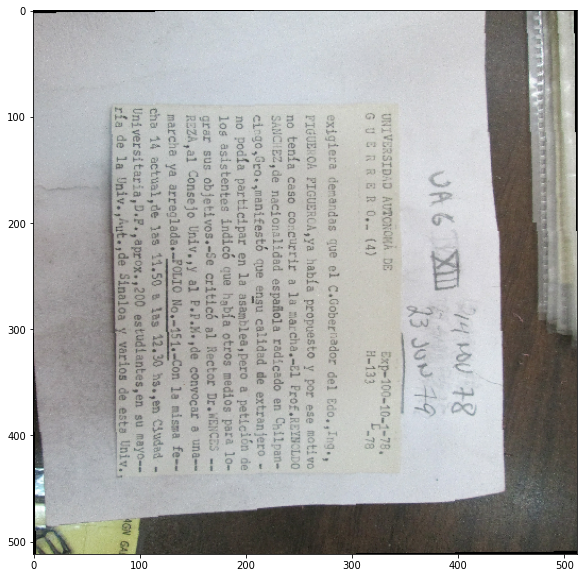

In [6]:
for i, angle in train_batches.take(1):
    i = tf.cast(i, tf.uint8)
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(i[0])
    print(angle[0])

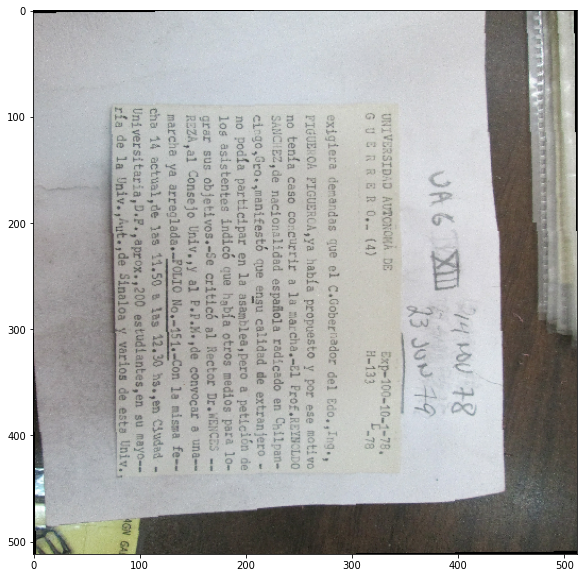

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(i[0])

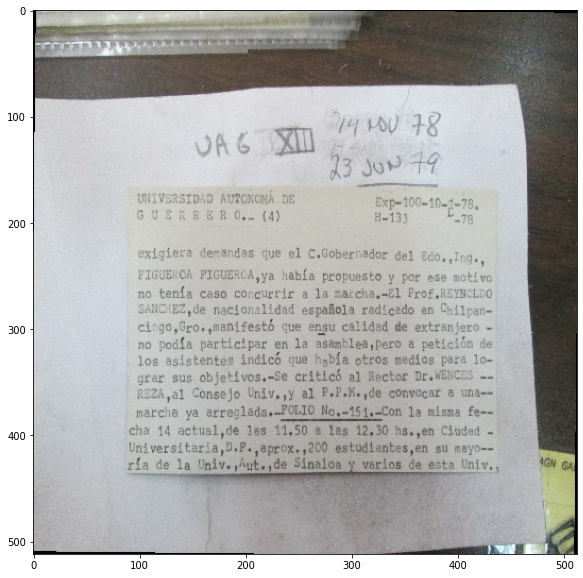

In [8]:
fig = plt.figure(figsize=(10, 10))
rotate = tfa.image.rotate(i[0], -angle[0])
plt.imshow(rotate)

In [12]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import activations

class CNN(tf.keras.models.Model):
    def __init__(self):
        super(CNN, self).__init__()
        d_model = 128
        self.conv_1 = tf.keras.Sequential([
            layers.experimental.preprocessing.Rescaling(1./255),
            #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
            #layers.experimental.preprocessing.RandomRotation(0.1),
            #layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
            layers.Conv2D(32, kernel_size=9, activation='relu',
                          strides=1, padding='same'),
            
        ])
        self.conv_2 = tf.keras.Sequential([
            layers.Conv2D(64, kernel_size=5,
                                    strides=2, padding='same'),
            layers.BatchNormalization(),
            layers.Activation(activations.relu)
        ])
        self.conv_3 = tf.keras.Sequential([
            layers.Conv2D(64, kernel_size=3, 
                                    strides=2, padding='same'),
            layers.BatchNormalization(),
            layers.Activation(activations.relu)

        ])
        
        self.angle = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(1)

        ])
    
    def call(self, inp, training=False):
        x = self.conv_1(inp)
        x = self.conv_2(x)
        x = self.conv_3(x)
        x = self.angle(x)
        return x
    
model = CNN()

temp_input = tf.random.uniform((8, 512, 512, 3), dtype=tf.int64, minval=0, maxval=200)

predictions = model(temp_input, training=False)

predictions  

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-0.00978883],
       [-0.05545961],
       [-0.01036412],
       [-0.054609  ],
       [ 0.00833252],
       [ 0.01177271],
       [-0.02229964],
       [-0.01544145]], dtype=float32)>

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])


In [20]:
epochs = 2
model.fit(
  train_batches,
  epochs=epochs
)


Epoch 1/2
104/104 [==============================] - 42s 407ms/step - loss: 547.3680 - accuracy: 0.0000e+00
Epoch 2/2
104/104 [==============================] - 42s 404ms/step - loss: 1275.0884 - accuracy: 0.0000e+00


# Predicciones del modelo

In [21]:
model(i)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[ 83.892105],
       [141.6516  ],
       [114.17793 ],
       [ 40.055355],
       [ 61.462296],
       [139.58997 ],
       [148.62726 ],
       [-52.487495]], dtype=float32)>

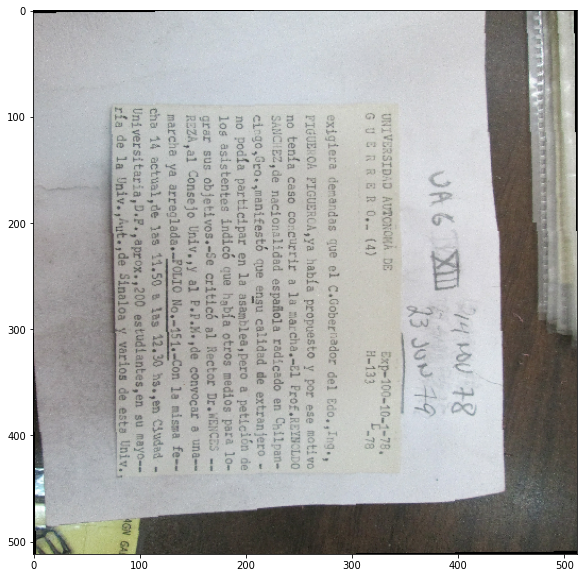

In [22]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(i[0])

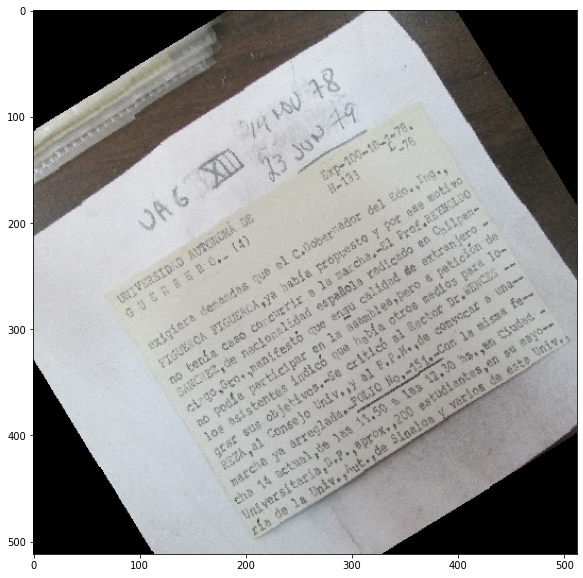

In [26]:
fig = plt.figure(figsize=(10, 10))
rotate = tfa.image.rotate(i[0], 83.8)
plt.imshow(rotate)